# Detecção de novidades utilizando LOF

In [1]:
#Bibliotecas utilizadas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA

In [2]:
#Carregar dataset para treinamento
dataset = pd.read_excel("pzt2.xlsx", header=None)

display(dataset)

,0,1,2,3,4,5,6,7,8,9,...,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970
0,30000.0,162.179,162.080,162.019,162.019,162.019,162.069,162.069,162.118,162.019,...,186.107,186.107,186.163,186.051,186.051,186.265,186.321,186.265,186.051,186.016
1,30010.0,164.697,164.647,164.697,164.537,164.537,164.588,164.537,164.638,164.537,...,188.648,188.648,188.705,188.648,188.648,188.648,188.806,188.806,188.591,188.389
2,30020.0,167.906,167.906,167.906,167.957,167.906,167.957,167.906,168.009,167.744,...,191.525,191.525,191.684,191.684,191.684,191.684,191.684,191.684,191.467,191.367
3,30030.0,171.637,171.583,171.583,171.637,171.583,171.637,171.637,171.690,171.473,...,195.126,195.185,195.126,195.126,195.126,195.185,195.285,195.285,195.126,194.749
4,30040.0,174.364,174.364,174.364,174.364,174.141,174.197,174.141,174.252,174.197,...,200.095,200.033,200.095,200.095,200.095,200.095,200.254,200.095,200.033,199.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,69960.0,662.970,662.970,663.175,663.997,664.409,663.586,663.586,664.616,666.062,...,778.363,778.081,778.081,778.081,777.798,778.081,778.081,778.646,780.348,783.488
3996,69970.0,664.822,665.028,665.235,666.269,666.477,665.855,665.855,666.892,668.140,...,776.670,776.389,776.389,776.670,776.107,776.670,776.670,776.952,779.213,782.915
3997,69980.0,658.891,659.094,659.906,660.721,661.332,660.721,660.517,661.332,662.970,...,771.912,771.634,771.634,771.634,771.356,771.634,771.634,772.190,774.984,779.780
3998,69990.0,652.867,653.066,653.464,654.463,654.863,654.263,654.263,655.063,656.670,...,763.656,763.112,763.112,763.384,762.840,763.384,763.384,763.929,767.212,772.747


In [3]:
#Remover outliers do dataset
new_dataset = dataset.loc[:, 0: 660]

display(new_dataset)

,0,1,2,3,4,5,6,7,8,9,...,651,652,653,654,655,656,657,658,659,660
0,30000.0,162.179,162.080,162.019,162.019,162.019,162.069,162.069,162.118,162.019,...,208.838,208.838,209.004,208.772,208.772,208.772,208.871,208.938,208.341,207.746
1,30010.0,164.697,164.647,164.697,164.537,164.537,164.588,164.537,164.638,164.537,...,211.826,211.891,211.719,211.859,211.686,211.891,211.789,211.928,211.887,211.985
2,30020.0,167.906,167.906,167.906,167.957,167.906,167.957,167.906,168.009,167.744,...,191.554,191.665,191.665,191.794,191.315,191.490,191.905,191.905,192.081,192.625
3,30030.0,171.637,171.583,171.583,171.637,171.583,171.637,171.637,171.690,171.473,...,183.656,183.538,183.538,183.715,183.597,183.538,183.825,183.766,183.834,183.734
4,30040.0,174.364,174.364,174.364,174.364,174.141,174.197,174.141,174.252,174.197,...,183.287,183.229,183.172,183.287,183.287,183.172,183.287,183.287,183.180,182.967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,69960.0,662.970,662.970,663.175,663.997,664.409,663.586,663.586,664.616,666.062,...,783.488,782.915,782.058,782.058,781.202,781.487,782.629,782.058,786.076,792.767
3996,69970.0,664.822,665.028,665.235,666.269,666.477,665.855,665.855,666.892,668.140,...,766.389,765.567,765.020,765.020,764.201,764.474,765.567,765.020,768.588,774.704
3997,69980.0,658.891,659.094,659.906,660.721,661.332,660.721,660.517,661.332,662.970,...,752.655,752.126,751.599,751.599,751.072,751.335,752.391,751.862,754.511,759.056
3998,69990.0,652.867,653.066,653.464,654.463,654.863,654.263,654.263,655.063,656.670,...,744.545,743.769,743.253,743.511,743.253,743.253,744.286,743.769,745.322,748.447


In [4]:
#Tratamento do dataset - Transpor dados
data = new_dataset.T

display(data)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,30000.000,30010.000,30020.000,30030.000,30040.000,30050.000,30060.000,30070.000,30080.000,30090.000,...,69910.000,69920.000,69930.000,69940.000,69950.000,69960.000,69970.000,69980.000,69990.000,70000.000
1,162.179,164.697,167.906,171.637,174.364,172.654,163.434,156.894,155.915,156.413,...,652.072,658.284,664.616,664.409,661.332,662.970,664.822,658.891,652.867,652.270
2,162.080,164.647,167.906,171.583,174.364,172.712,163.434,156.894,155.915,156.413,...,652.072,658.486,664.822,664.409,661.332,662.970,665.028,659.094,653.066,652.270
3,162.019,164.697,167.906,171.583,174.364,172.712,163.380,156.894,155.964,156.413,...,652.270,658.284,664.822,665.028,661.741,663.175,665.235,659.906,653.464,652.668
4,162.019,164.537,167.957,171.637,174.364,172.711,163.487,156.944,155.964,156.300,...,653.066,659.094,665.855,665.855,662.560,663.997,666.269,660.721,654.463,653.664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,208.772,211.891,191.490,183.538,183.172,184.353,185.141,187.012,189.023,190.505,...,820.083,821.026,817.891,811.385,798.976,781.487,764.474,751.335,743.253,739.916
657,208.871,211.789,191.905,183.825,183.287,184.353,185.084,186.852,189.023,190.665,...,821.026,822.286,819.142,812.308,800.170,782.629,765.567,752.391,744.286,740.683
658,208.938,211.928,191.905,183.766,183.287,184.353,185.141,187.012,189.023,190.723,...,820.397,821.340,818.516,811.692,799.573,782.058,765.020,751.862,743.769,740.171
659,208.341,211.887,192.081,183.834,183.180,184.248,184.980,186.852,188.863,190.564,...,821.340,822.918,820.711,814.470,803.472,786.076,768.588,754.511,745.322,741.196


In [5]:
#Tratamento dos dados - Remover linha da frequencia
new_data = data.drop([0], axis=0)

display(new_data)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
1,162.179,164.697,167.906,171.637,174.364,172.654,163.434,156.894,155.915,156.413,...,652.072,658.284,664.616,664.409,661.332,662.970,664.822,658.891,652.867,652.270
2,162.080,164.647,167.906,171.583,174.364,172.712,163.434,156.894,155.915,156.413,...,652.072,658.486,664.822,664.409,661.332,662.970,665.028,659.094,653.066,652.270
3,162.019,164.697,167.906,171.583,174.364,172.712,163.380,156.894,155.964,156.413,...,652.270,658.284,664.822,665.028,661.741,663.175,665.235,659.906,653.464,652.668
4,162.019,164.537,167.957,171.637,174.364,172.711,163.487,156.944,155.964,156.300,...,653.066,659.094,665.855,665.855,662.560,663.997,666.269,660.721,654.463,653.664
5,162.019,164.537,167.906,171.583,174.141,172.712,163.434,156.944,155.964,156.413,...,653.464,659.500,666.062,666.269,662.970,664.409,666.477,661.332,654.863,654.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,208.772,211.891,191.490,183.538,183.172,184.353,185.141,187.012,189.023,190.505,...,820.083,821.026,817.891,811.385,798.976,781.487,764.474,751.335,743.253,739.916
657,208.871,211.789,191.905,183.825,183.287,184.353,185.084,186.852,189.023,190.665,...,821.026,822.286,819.142,812.308,800.170,782.629,765.567,752.391,744.286,740.683
658,208.938,211.928,191.905,183.766,183.287,184.353,185.141,187.012,189.023,190.723,...,820.397,821.340,818.516,811.692,799.573,782.058,765.020,751.862,743.769,740.171
659,208.341,211.887,192.081,183.834,183.180,184.248,184.980,186.852,188.863,190.564,...,821.340,822.918,820.711,814.470,803.472,786.076,768.588,754.511,745.322,741.196


In [6]:
#Aplicando PCA em X_train
pca = PCA(n_components=2)
principalComponents_X_train = pca.fit_transform(new_data)
principalDf_X_train = pd.DataFrame(data= principalComponents_X_train)

display(principalDf_X_train)

,0,1
0,-4028.885807,-2522.644477
1,-4035.309335,-2522.747228
2,-4030.739325,-2523.964473
3,-4029.166019,-2524.855590
4,-4026.195762,-2525.083895
...,...,...
655,5165.974010,-3539.876301
656,5160.704880,-3541.118307
657,5155.248827,-3539.990374
658,5178.526614,-3536.860243


In [7]:
#Gerar novas observações
dataset_outliers = dataset.loc[:, 661: 2970]

display(dataset_outliers)

,661,662,663,664,665,666,667,668,669,670,...,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970
0,166.940,166.518,166.358,166.198,165.936,165.878,165.667,165.717,165.507,165.397,...,186.107,186.107,186.163,186.051,186.051,186.265,186.321,186.265,186.051,186.016
1,169.590,169.429,169.055,168.895,168.682,168.734,168.573,168.412,168.412,168.251,...,188.648,188.648,188.705,188.648,188.648,188.648,188.806,188.806,188.591,188.389
2,173.226,172.955,172.576,172.414,172.360,172.089,172.035,171.873,171.710,171.657,...,191.525,191.525,191.684,191.684,191.684,191.684,191.684,191.684,191.467,191.367
3,176.950,176.510,176.289,175.959,175.959,175.739,175.409,175.409,175.409,175.244,...,195.126,195.185,195.126,195.126,195.126,195.185,195.285,195.285,195.126,194.749
4,179.447,179.050,178.823,178.480,178.253,178.369,178.027,177.800,177.800,177.688,...,200.095,200.033,200.095,200.095,200.095,200.095,200.254,200.095,200.033,199.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,670.860,669.811,669.811,669.602,669.602,669.602,668.974,668.766,668.766,668.348,...,778.363,778.081,778.081,778.081,777.798,778.081,778.081,778.646,780.348,783.488
3996,659.500,658.689,658.689,658.689,658.689,658.891,658.486,658.486,658.486,658.082,...,776.670,776.389,776.389,776.670,776.107,776.670,776.670,776.952,779.213,782.915
3997,655.263,654.663,654.063,653.863,653.863,653.664,653.265,653.265,653.066,652.668,...,771.912,771.634,771.634,771.634,771.356,771.634,771.634,772.190,774.984,779.780
3998,656.066,655.263,654.463,653.863,653.863,653.664,653.066,653.066,652.867,652.469,...,763.656,763.112,763.112,763.384,762.840,763.384,763.384,763.929,767.212,772.747


In [8]:
#Tratamento dos dados de anomalia - Transpor dados
data_anomalia = dataset_outliers.T

display(data_anomalia)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
661,166.940,169.590,173.226,176.950,179.447,170.780,160.324,157.815,158.669,159.576,...,663.381,672.123,676.154,676.368,677.009,670.860,659.500,655.263,656.066,658.891
662,166.518,169.429,172.955,176.510,179.050,170.550,160.376,157.799,158.556,159.417,...,662.355,671.070,675.089,675.089,675.727,669.811,658.689,654.663,655.263,657.880
663,166.358,169.055,172.576,176.289,178.823,170.840,160.480,157.520,158.395,159.306,...,661.128,669.602,674.026,674.026,674.451,669.811,658.689,654.063,654.463,656.871
664,166.198,168.895,172.414,175.959,178.480,170.671,160.088,157.355,158.121,158.986,...,660.313,668.766,673.391,673.391,673.391,669.602,658.689,653.863,653.863,656.267
665,165.936,168.682,172.360,175.959,178.253,170.671,160.140,157.405,158.170,159.035,...,660.313,668.348,672.968,673.179,673.179,669.602,658.689,653.863,653.863,656.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,186.265,188.648,191.684,195.185,200.095,207.909,219.236,217.125,193.262,182.750,...,788.100,789.262,786.076,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2967,186.321,188.806,191.684,195.285,200.254,208.136,219.166,217.437,193.196,182.920,...,787.810,789.262,785.787,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2968,186.265,188.806,191.684,195.285,200.095,208.071,219.236,217.229,193.440,182.920,...,788.390,789.552,786.364,785.211,780.064,778.646,776.952,772.190,763.929,751.599
2969,186.051,188.591,191.467,195.126,200.033,207.909,219.096,217.333,193.572,182.758,...,788.680,791.010,788.100,787.231,782.343,780.348,779.213,774.984,767.212,755.575


In [9]:
#Aplicando PCA para anomalias
pca = PCA(n_components=2)
principalComponents_X_anomalia = pca.fit_transform(data_anomalia)
principalDf_X_anomalia = pd.DataFrame(data= principalComponents_X_anomalia)

display(principalDf_X_anomalia)

,0,1
0,-3652.596508,-2344.858724
1,-3661.051057,-2360.384701
2,-3663.435905,-2370.588325
3,-3662.732385,-2378.815026
4,-3664.454061,-2385.111892
...,...,...
2305,4560.047673,-3147.200499
2306,4559.569789,-3146.413140
2307,4562.557695,-3143.800507
2308,4583.821188,-3129.098920


In [10]:
#Ajustar o modelo para detecção de novidade (novelty = True)
clf = LocalOutlierFactor(n_neighbors=10, novelty=True, contamination=0.15)
clf.fit(principalDf_X_train)

LocalOutlierFactor(contamination=0.15, n_neighbors=10, novelty=True)

In [11]:
#Predicao dos dados X_test e X_outliers
y_pred_test = clf.predict(principalDf_X_anomalia)

#Numero de erros dos dados
n_error_test = y_pred_test[y_pred_test == -1].size

Text(0, 0.5, 'Dim. 2')

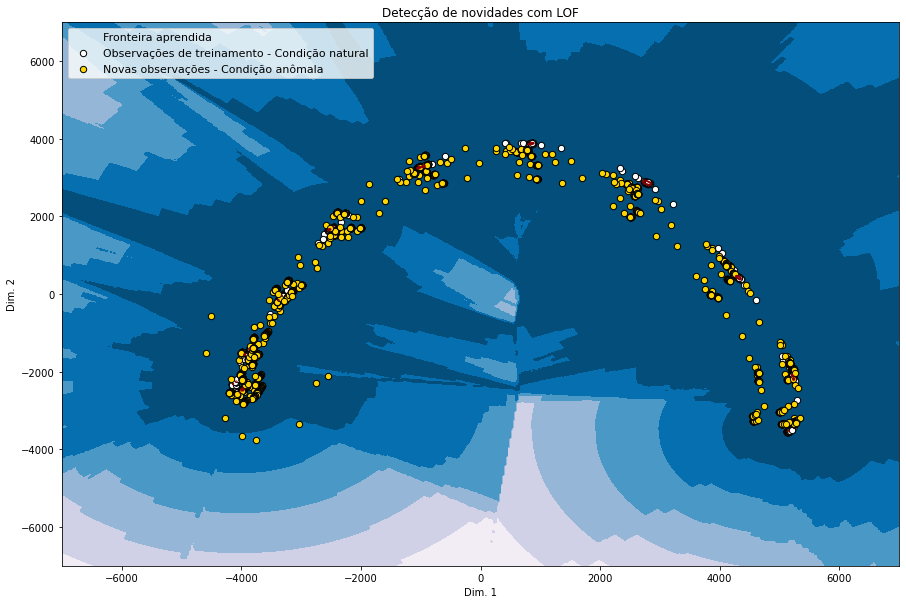

In [24]:
xx, yy = np.meshgrid(np.linspace(-7000, 7000, 500), np.linspace(-7000, 7000, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15,10))
plt.title("Detecção de novidades com LOF")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(principalDf_X_train[0], principalDf_X_train[1], c="white", s=s, edgecolors="k")
c = plt.scatter(principalDf_X_anomalia[0], principalDf_X_anomalia[1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-7000, 7000))
plt.ylim((-7000, 7000))

plt.legend(
    [a.collections[0], b1, c],
    [
        "Fronteira aprendida",
        "Observações de treinamento - Condição natural",
        "Novas observações - Condição anômala",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)

plt.xlabel("Dim. 1")
plt.ylabel("Dim. 2")

In [25]:
print("Outliers identificados: ", n_error_test)

Outliers identificados:  2243


In [26]:
n_error = y_pred_test[y_pred_test == 1].size

print("Outliers não identificados: ", n_error)

Outliers não identificados:  67
